In [17]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import pandas as pd

from helpers import plot_tools as ptools

import os

val_mae = 0.11


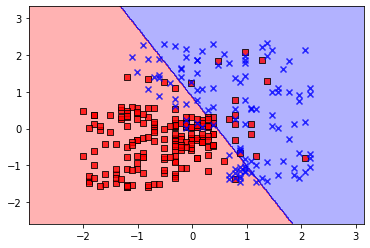

In [18]:
# Load data
social_network_file_path = os.path.join('input', 'Social_Network_Ads.csv')
socnet_data = pd.read_csv(social_network_file_path)

# Filter rows with missing values ("drop non-available")
filtered_socnet_data = socnet_data.dropna(axis=0)

# Define target and features
socnet_features = ['Age', 'EstimatedSalary']
X = filtered_socnet_data[socnet_features]
y = filtered_socnet_data.Purchased

# Split data into training and validation data, for both features and target.
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.25, random_state=0)

# feature scaling
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
val_X = sc.transform(val_X)

# Define model
socnet_model = LogisticRegression(random_state=1)

# Fit model
socnet_model.fit(train_X, train_y)

# get predicted purchased on validation data
val_predictions = socnet_model.predict(val_X)

# print mean_absolute_error
val_mae = mean_absolute_error(val_y, val_predictions)
print(f'{val_mae = }')

ptools.plot_decision_regions(train_X, train_y, socnet_model, resolution=0.02)

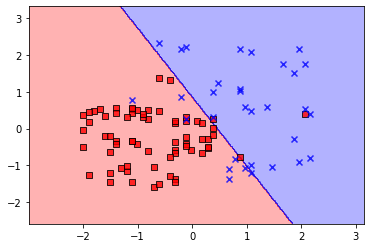

In [19]:
ptools.plot_decision_regions(val_X, val_y, socnet_model, resolution=0.02)
